### Dieses Notebook zeigt ein einfaches Beispiel für ein flaches neuronales Netz zum Trainieren des MNIST-Datensatzes.

Laden der nötigen Bibliotheken:

In [31]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import SGD, RMSprop, Adam 
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt

Laden und Aufbereiten der Trainingsdaten:

In [32]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test  = x_test / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test =  keras.utils.to_categorical(y_test,  10)

Definition des Neuronalen Netzes:
(Probieren Sie aus, wie sich das Netz verhält, wenn man statt 'relu' 'tanh' oder 'sigmoid' als Aktivierungsfunktion verwendet und wenn man L2-Regularisierung hinzufügt)

In [33]:
model = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(150, activation='relu'),
    Dense(150, activation='relu', kernel_regularizer=regularizers.L2(0.005)),
    Dense(10, activation='softmax')])

Ausgabe der Netzstruktur:

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 150)               117750    
                                                                 
 dense_10 (Dense)            (None, 150)               22650     
                                                                 
 dense_11 (Dense)            (None, 10)                1510      
                                                                 
Total params: 141,910
Trainable params: 141,910
Non-trainable params: 0
_________________________________________________________________


Erstellen des Netzes mit Optimierungsmethode (z.B. SGD, RMSprop oder Adam):

In [35]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

Trainineren des Netzes:

In [36]:
history = model.fit(x_train, y_train,
                    batch_size=6000,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/50
10/10 [==============================] - 1s 84ms/step - loss: 2.5355 - accuracy: 0.5414 - val_loss: 1.8730 - val_accuracy: 0.7645
Epoch 2/50
10/10 [==============================] - 0s 25ms/step - loss: 1.5115 - accuracy: 0.8094 - val_loss: 1.1690 - val_accuracy: 0.8598
Epoch 3/50
10/10 [==============================] - 0s 26ms/step - loss: 1.0699 - accuracy: 0.8723 - val_loss: 0.9468 - val_accuracy: 0.8964
Epoch 4/50
10/10 [==============================] - 0s 32ms/step - loss: 0.9056 - accuracy: 0.8966 - val_loss: 0.8344 - val_accuracy: 0.9061
Epoch 5/50
10/10 [==============================] - 0s 29ms/step - loss: 0.8015 - accuracy: 0.9086 - val_loss: 0.7446 - val_accuracy: 0.9165
Epoch 6/50
10/10 [==============================] - 0s 28ms/step - loss: 0.7189 - accuracy: 0.9178 - val_loss: 0.6718 - val_accuracy: 0.9231
Epoch 7/50
10/10 [==============================] - 0s 27ms/step - loss: 0.6506 - accuracy: 0.9239 - val_loss: 0.6120 - val_accuracy: 0.9284
Epoch 8/50
10

Berechnen und Bewerten der Netzausgabe nach dem Training:

In [37]:
score = model.evaluate(x_test, y_test, verbose=0)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.1286529004573822
Test accuracy: 0.9722999930381775


Ausgabe des Netzfehlers während des Trainingsverlaufes (fuer Trainingsdaten und Testdaten):

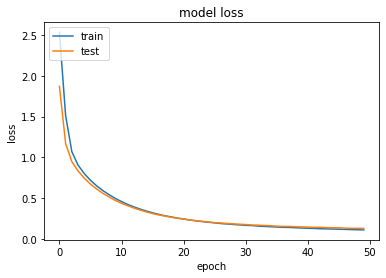

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Ausgabe der Netz-Accuracy waehrend des Trainingsverlaufes (fuer Trainingsdaten und Testdaten):

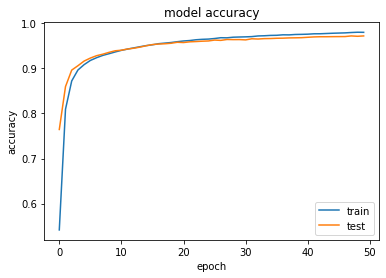

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

Ausgabe der falsch klassifizierten Testdaten-Bilder:

In [40]:
# pred = model.predict(x_test)
# mask = ~(np.argmax(pred,axis=1)==np.argmax(y_test,axis=1))
# wrong_pred=pred[mask,:]
# wrong_label=np.argmax(wrong_pred,axis=1)
# wrong_y=y_test[mask,:]
# wrong_x=x_test[mask,:,:]
# print(wrong_pred.shape[0],'out of',pred.shape[0],'false classifications in test dataset (',int(wrong_pred.shape[0]/pred.shape[0]*10000)/100,'% )')

# for i in range(wrong_y.shape[0]):
#     plt.imshow(1-wrong_x[i,:,:],cmap='gray')
#     plt.title(str(np.argmax(wrong_y[i,:]))+' detected as '+str(wrong_label[i]))
#     plt.axis('off')
#     plt.show()